# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [26]:
import requests
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [2]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [3]:
stopw = stopwords.words('english')
sia = vader.SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing the macbeth_string:

In [4]:
macbeth_words = word_tokenize(macbeth_string)

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.

Write a for loop that iterates over your Macbeth word list, and:
* if the compound score of a word is positive, add the word to the positive-word list
* if the compound score of a word is negative, add the word to the negative-word list

In [5]:
p_words = []
n_words = []
for w in macbeth_words:
    if sia.polarity_scores(w)['compound'] > 0:
        p_words.append(w)
    if sia.polarity_scores(w)['compound'] < 0:
        n_words.append(w)

For any list `mylist`, you can get the word frequencies of words in `mylist` using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.

Use these commands to:
1. find the 15 most common negative words in Macbeth and the 15 most common positive words
2. make a horizontal bar plot similar to the plots in the following
3. comment on similarities and differences to the Macbeth plot below

(Plot taken from https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/)

![Pos-Neg-Words in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-19-1.png)

(0.0, 70.0)

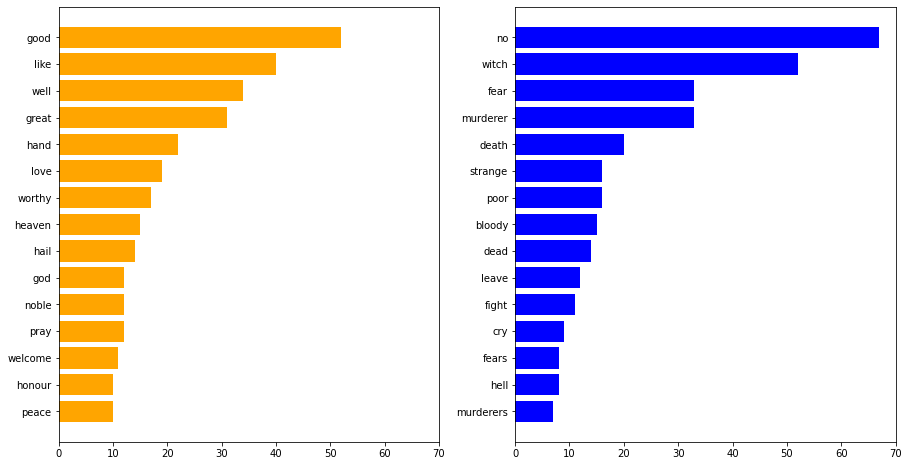

In [41]:
# Code:

p_15 = nltk.FreqDist(p_words).most_common(15)
n_15 = nltk.FreqDist(n_words).most_common(15)
fig,ax = plt.subplots(1,2,figsize=(15,8))

p_15_words = []
n_15_words = []
p_15_freq = []
n_15_freq = []
for i in p_15:
    p_15_words.append(i[0])
    p_15_freq.append(i[1])
for j in n_15:
    n_15_words.append(j[0])
    n_15_freq.append(j[1])

ax[0].barh(p_15_words, p_15_freq, align='center',color='orange')
ax[1].barh(n_15_words, n_15_freq, align='center',color='blue')
ax[0].invert_yaxis() 
ax[1].invert_yaxis() 
ax[0].set_xlim(0,70)
ax[1].set_xlim(0,70)

### comments:
**Similarities**: the two plots are similar in the distribution shape. If we leave out the negation signal "no", the appearing frequency of the two most frequent words of these two sets are approximate. 

**Differences**: there is no overlapping words between the postive set and the negative set. 



The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

(0.0, 70.0)

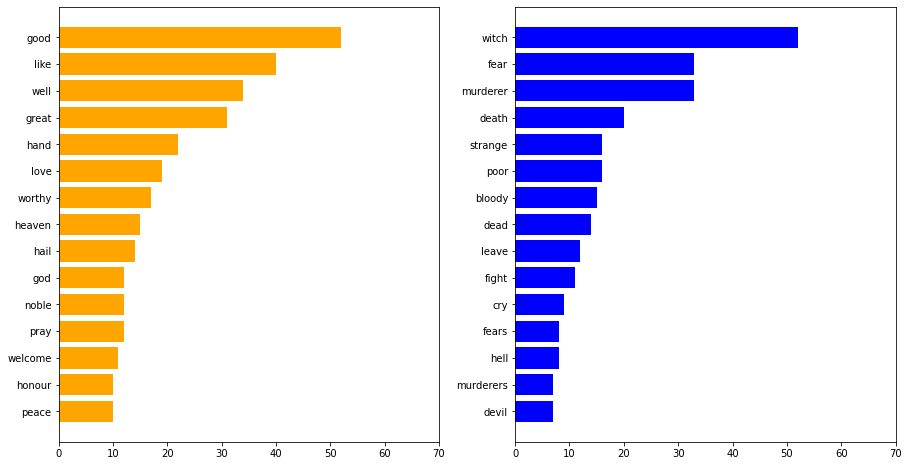

In [47]:
# Code:

from string import punctuation
myStopWord = stopwords.words('english') + list(punctuation)
mac_no_stop = []
for n in macbeth_words:
    if n not in myStopWord:
        mac_no_stop.append(n)

p_words = []
n_words = []
for m in mac_no_stop:
    if sia.polarity_scores(m)['compound'] > 0:
        p_words.append(m)
    if sia.polarity_scores(m)['compound'] < 0:
        n_words.append(m)
p_15 = nltk.FreqDist(p_words).most_common(15)
n_15 = nltk.FreqDist(n_words).most_common(15)

fig,ax = plt.subplots(1,2,figsize=(15,8))

p_15_words = []
n_15_words = []
p_15_freq = []
n_15_freq = []
for a in p_15:
    p_15_words.append(a[0])
    p_15_freq.append(a[1])
for b in n_15:
    n_15_words.append(b[0])
    n_15_freq.append(b[1])

ax[0].barh(p_15_words, p_15_freq, align='center',color='orange')
ax[1].barh(n_15_words, n_15_freq, align='center',color='blue')
ax[0].invert_yaxis() 
ax[1].invert_yaxis() 
ax[0].set_xlim(0,70)
ax[1].set_xlim(0,70)

###  comments:

The only difference is that the "no" at the top of the negative words has been removed. 


* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

(0.0, 70.0)

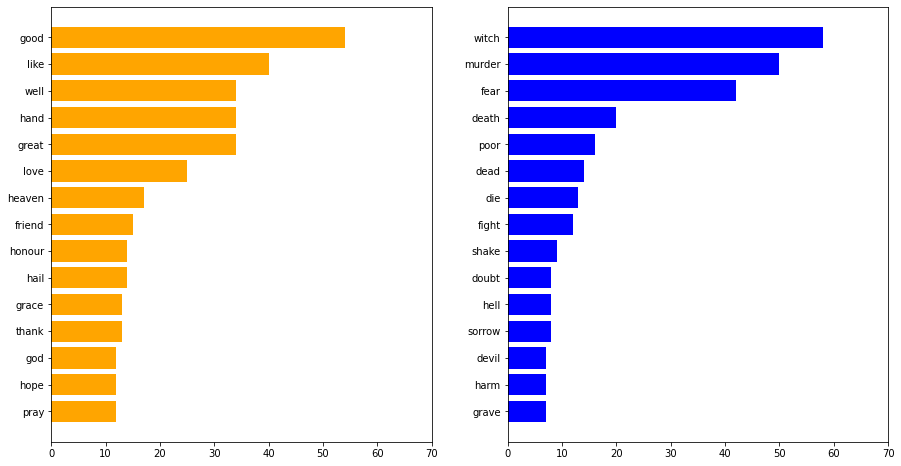

In [48]:
# Code:

wordPorterStems = [PorterStemmer().stem(w) for w in mac_no_stop]
p_words = []
n_words = []
for m in wordPorterStems:
    if sia.polarity_scores(m)['compound'] > 0:
        p_words.append(m)
    if sia.polarity_scores(m)['compound'] < 0:
        n_words.append(m)
p_15 = nltk.FreqDist(p_words).most_common(15)
n_15 = nltk.FreqDist(n_words).most_common(15)

fig,ax = plt.subplots(1,2,figsize=(15,8))

p_15_words = []
n_15_words = []
p_15_freq = []
n_15_freq = []
for a in p_15:
    p_15_words.append(a[0])
    p_15_freq.append(a[1])
for b in n_15:
    n_15_words.append(b[0])
    n_15_freq.append(b[1])

ax[0].barh(p_15_words, p_15_freq, align='center',color='orange')
ax[1].barh(n_15_words, n_15_freq, align='center',color='blue')
ax[0].invert_yaxis() 
ax[1].invert_yaxis() 
ax[0].set_xlim(0,70)
ax[1].set_xlim(0,70)

### comments:

"murder" and "murderer" have been counted together in the negative words rank, and the "die" in different tenses have been counted together so that "die" can enter the top 15, so does "fight" and "sorrow". In the positive words rank, more verbs appear in the top 15, such as "love", "thank" and "hope", which indicate they are counted together with their morphological variants. 

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):
![Sentiment Evolution in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-11-1.png)

We are going to make a couple different plots.

First:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by summing the compound scores of all the words in that scene
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

<BarContainer object of 25 artists>

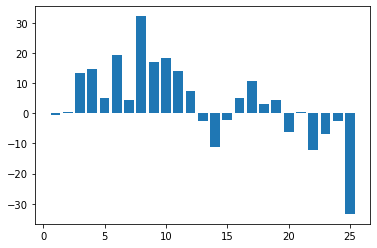

In [64]:
# Code:

scores = []
scene_words = []
for s in r_j_scenes:
    scene_words.append(word_tokenize(s))
    scene_score = []
    for w in word_tokenize(s):
        scene_score.append(sia.polarity_scores(w)['compound'])
    scores.append(sum(scene_score))

scene_num = list(range(1,len(scores)+1))
fig, ax = plt.subplots()
ax.bar(scene_num, scores)

### comments:

Both the plots indicate the major sentiment for the previous half part of Romeo and Juliet is positive and the second half part negative. Despite the difference in the height of the peaks, the two plots are similar in the major trend of sentiment. 


Second:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

<BarContainer object of 25 artists>

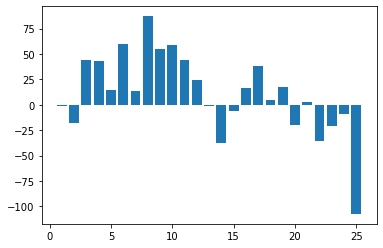

In [66]:
# Code:

scores = []
scene_words = []
for s in r_j_scenes:
    scene_words.append(word_tokenize(s))
    scene_score = []
    for w in word_tokenize(s):
        word_sent = sia.polarity_scores(w)['compound']
        if word_sent > 0: 
            scene_score.append(word_sent+1)
        if word_sent < 0:
            scene_score.append(word_sent-1)
    scores.append(sum(scene_score))

scene_num = list(range(1,len(scores)+1))
fig, ax = plt.subplots()
ax.bar(scene_num, scores)

### comments:

Though the trend of this plot is similar to the above one, the scale of the y-axis becomes larger, so it indicates that both the positive and negative sentiments have been magnified, and thus some tiny and subtle sentiment difference might be revealed more clearly in this chart.  

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [67]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [72]:
testword = 'find'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

find is neither positive nor negative


Third plot:

* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

<BarContainer object of 25 artists>

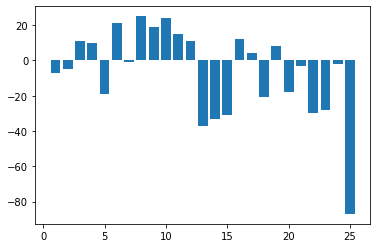

In [75]:
# Code:

scores = []
scene_words = []
for s in r_j_scenes:
    scene_words.append(word_tokenize(s))
    scene_score = 0
    for w in word_tokenize(s):
        if w in positive_words: 
            scene_score += 1
        if w in negative_words:
            scene_score -= 1
    scores.append(scene_score)

scene_num = list(range(1,len(scores)+1))
fig, ax = plt.subplots()
ax.bar(scene_num, scores)

### comments:

The positive peak is lower and the negative peak in the graph is higher. It indicates the sentiments of all the scenes are analyzed to be more negative in this plot. 

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

<BarContainer object of 65 artists>

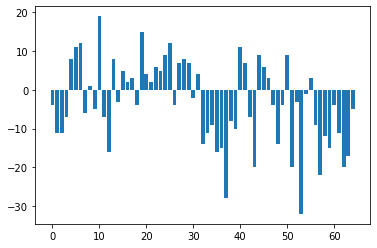

In [80]:
# Code:

r_j_str = word_tokenize(r_j_string)
groups = []
cut = 0
while (cut+500) < len(r_j_str):
    groups.append(r_j_str[cut:cut+500])
    cut += 500
groups.append(r_j_str[cut:len(r_j_str)])
scores = []
for g in groups:
    group_score = 0
    for w in g:
        if w in positive_words: 
            group_score += 1
        if w in negative_words:
            group_score -= 1
    scores.append(group_score)
    
group_num = list(range(len(scores)))
fig, ax = plt.subplots()
ax.bar(group_num, scores)

### comments:

This analysis is more fine-grained and can reveal very tiny sentiment change compared with the above ones plotted based on chapters. 

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

I would use the the entire string of Romeo and Juliet as the raw data, and divide them with an appropriate group scale, and then apply sentiment analysis using the positive and negative word sets. First, it might be cursory to analyze the sentiments by different chapters since there might also be considerable up and downs of sentiment within one chapter, so that the method to use chapters as groups may lead to a neutral outcome as the positive value could be neutralized by the negative value. Applying the sentiment analysis not based on the chapter division can avoid this problem. 

The negative and positive sets seem more accurate intuitively, as the vader model had a low accuracy in previous sentiment analysis in last lecture. 